In [50]:
import pandas as pd
import yfinance as yf

In [176]:
import wrds


In [177]:
db = wrds.Connection(wrds_username='rudragarg')

Loading library list...
Done


In [137]:
def get_data(symbol, interval = "1d", period = "max"):
    return yf.download(symbol,interval=interval, period=period)

In [138]:
sp500 = get_data("^GSPC")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [139]:
sp500.index = pd.to_datetime(sp500.index)


In [140]:
sp500 = sp500.resample('1M').mean()

In [141]:
sp500.index = sp500.index.date

In [142]:
sp500

,Close
1950-01-31,16.875714
1950-02-28,17.192778
1950-03-31,17.346522
1950-04-30,17.845263
1950-05-31,18.434546
...,...
2022-06-30,3898.946684
2022-07-31,3911.729492
2022-08-31,4158.563084
2022-09-30,3850.520496


In [143]:
rf = pd.read_csv("risk_free_1_mo.csv")

In [144]:
rf["date"] = pd.to_datetime(rf["date"].apply(str))

In [145]:
rf = rf.set_index("date")

In [146]:
rf = rf.resample('1M').mean()

In [147]:
rf

,rf
date,
1926-07-31,0.00009
1926-08-31,0.00010
1926-09-30,0.00009
1926-10-31,0.00013
1926-11-30,0.00013
...,...
2022-04-30,0.00001
2022-05-31,0.00001
2022-06-30,0.00003


<AxesSubplot:xlabel='date'>

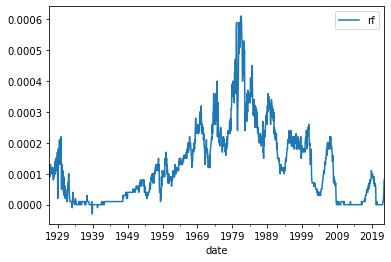

In [148]:
rf.plot()

In [149]:
sp500["mkt_return"] = sp500["Close"].pct_change()

In [150]:
sp500 = sp500[1:]

In [151]:
mkt = pd.merge(sp500, rf, left_index=True, right_index=True)

In [389]:
fff = pd.DataFrame()

In [390]:
fff["mkt-rf"] = mkt["mkt_return"] - mkt["rf"]

In [391]:
fff

,mkt-rf
1950-02-28,0.018748
1950-03-31,0.008902
1950-04-30,0.028712
1950-05-31,0.032982
1950-06-30,0.016357
...,...
2022-04-30,-0.000003
2022-05-31,-0.079926
2022-06-30,-0.035030
2022-07-31,0.003239


In [22]:

# stocks_org = pd.read_csv("all_stocks.csv")
# stocks = stocks_org.copy()
# stocks.drop("PERMNO", axis=1, inplace=True)
# stocks = stocks[stocks["PRC"] > 0]
# stocks = stocks[stocks["SHROUT"] > 0]
# stocks.shape
# stocks["date"] = pd.to_datetime(stocks["date"].apply(str))
# stocks.set_index("date", inplace=True)
# stocks["Market Cap"] = stocks["PRC"] * stocks["SHROUT"]
# stocks
# len(stocks["TICKER"].unique())
# stocks["PRC"].max()

In [23]:
# from unittest import result
# import warnings
# warnings.filterwarnings("ignore")

# returns = pd.DataFrame()
# count = 0
# for firm in stocks["TICKER"].unique():
#     stock = stocks[stocks["TICKER"] == firm]
#     stock_monthly = stock.resample('1M').mean()
#     stock_monthly["return"] = stock_monthly["PRC"].pct_change()
#     stock_monthly["ticker"] = firm
#     #display(stock_monthly)
#     returns = returns.append(stock_monthly, ignore_index=True)
    
#     count += 1
#     if count % 10 == 0:
#         print(count)



In [24]:
stocks = pd.read_csv("monthly_stocks.csv")

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_65269/1077546959.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv("monthly_stocks.csv")


In [25]:
# stocks = stocks_org.copy()


In [26]:
stocks.head()

,PERMNO,Ticker,MthCalDt,MthPrc,ShrOut
0,10000,OMFGA,19860131,4.3750,3680.0
1,10000,OMFGA,19860228,3.2500,3680.0
2,10000,OMFGA,19860331,4.4375,3680.0
3,10000,OMFGA,19860430,4.0000,3793.0
4,10000,OMFGA,19860530,3.1094,3793.0


In [27]:
stocks.dtypes

PERMNO        int64
Ticker       object
MthCalDt      int64
MthPrc       object
ShrOut      float64
dtype: object

In [28]:
stocks['MthPrc'] = pd.to_numeric(stocks['MthPrc'], errors='coerce')

In [29]:
stocks.drop("PERMNO", axis=1, inplace=True)
stocks = stocks[stocks["MthPrc"] > 0]
stocks = stocks[stocks["ShrOut"] > 0]

In [30]:
stocks.rename({"MthCalDt":"date"},axis=1, inplace=True)

In [31]:
stocks["date"] = pd.to_datetime(stocks["date"].apply(str))
stocks.set_index("date", inplace=True)
stocks["Market Cap"] = stocks["MthPrc"] * stocks["ShrOut"]

In [32]:
stocks

,Ticker,MthPrc,ShrOut,Market Cap
date,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04
...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08


In [33]:
len(stocks["Ticker"].unique())

27505

In [34]:
stocks.dtypes

Ticker         object
MthPrc        float64
ShrOut        float64
Market Cap    float64
dtype: object

In [35]:
import numpy as np

In [37]:
# current_firm = None
# current_index = 0
# adding_index = []
# for firm in stocks.Ticker:
#     if firm != current_firm:
#         adding_index.append(current_index)
#         current_firm = firm
#     current_index+=1


In [38]:
#adding_index

In [39]:
#len(adding_index)

In [40]:
# line = pd.DataFrame({"Ticker": np.nan, "MthPrc": np.nan, "ShrOut": np.nan, "Market Cap":np.nan}, index=pd.to_datetime(["2030/12/31"]))
# number_added = 0
# for index in adding_index:
#     stocks = pd.concat([stocks.iloc[:index+number_added], line, stocks.iloc[index+number_added:]])
#     if number_added % 100

In [41]:
stocks

,Ticker,MthPrc,ShrOut,Market Cap
date,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04
...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08


In [42]:
stocks.dropna(inplace=True)

In [43]:
firms = list(stocks["Ticker"].unique())
firms

['OMFGA',
 'EGAS',
 'BTFG',
 'GCBK',
 'WERC',
 'ACF',
 'SHRD',
 'GACO',
 'IROQ',
 'CBOT',
 'ATCS',
 'DPAC',
 'AAPI',
 'AJ',
 'AMFD',
 'SCTT',
 'CCUR',
 'DCIS',
 'IFRS',
 'KEYC',
 'BIRI',
 'DOCX',
 'AEPI',
 'JJSF',
 'TNII',
 'ELA',
 'AIF',
 'ABK',
 'ANTQ',
 'PLXS',
 'MABK',
 'HCSB',
 'GGUY',
 'NURO',
 'FBCP',
 'POCI',
 'ATCM',
 'HARVY',
 'GGGG',
 'CAU',
 'AATI',
 'RMCF',
 'OLVR',
 'MENU',
 'LMNT',
 'CTYA',
 'ABCC',
 'HNGR',
 'VLVL',
 'CDNI',
 'BNUI',
 'GRAR',
 'NMIL',
 'AMT',
 'ABKC',
 'OFSLY',
 'FSCNY',
 'USBK',
 'ENSO',
 'AHTS',
 'TTI',
 'ADX',
 'FKWL',
 'HYGA',
 'APGI',
 'AJIL',
 'DIGT',
 'AB',
 'SMRX',
 'ABSI',
 'VWRX',
 'SCAT',
 'STRS',
 'JAVA',
 'GCCC',
 'MHCO',
 'ACSE',
 'CMTK',
 'CRCC',
 'UCI',
 'LBSC',
 'BUTI',
 'VRBB',
 'ATGI',
 'AMSE',
 'ITXI',
 'KDE',
 'AIRC',
 'TUES',
 'SYGN',
 'CIBA',
 'FACE',
 'POLY',
 'ABCI',
 'ALRN',
 'PACR',
 'AN',
 'ACSC',
 'ORCL',
 'TPPS',
 'LNSB',
 'MSFT',
 'SDS',
 'MWSB',
 'IFEX',
 'AADR',
 'AKLM',
 'CSBN',
 'ACUR',
 'UMBE',
 'COHY',
 'TW',
 'PJC',

In [91]:
from unittest import result
import warnings
warnings.filterwarnings("ignore")

firms = list(stocks["Ticker"].unique())

returns = pd.DataFrame()
count = 0
for firm in firms: 
    stock_monthly = stocks[stocks["Ticker"] == firm]
    stock_monthly.sort_index()
    #display(stock_monthly)
    stock_monthly.sort_values("date", ascending=True, inplace=True)
    stock_monthly["return"] = stock_monthly["MthPrc"].pct_change()
    returns = returns.append(stock_monthly, ignore_index=False)
    count += 1
    if count % 100 == 0:
        print((count/len(firms)) * 100)

0.3635834787667248
0.7271669575334496
1.0907504363001745
1.4543339150668992
1.8179173938336242
2.181500872600349


KeyboardInterrupt: 

In [93]:
returns[returns["Ticker"] == "EGAS"].to_csv("EGAS.csv")

In [85]:
returns[returns["return"] > 1]

,Ticker,MthPrc,ShrOut,Market Cap,return
date,,,,,
1999-02-26,EGAS,8.7500,2421.0,21183.7500,1.058824
1999-07-30,EGAS,8.8125,2450.0,21590.6250,1.169231
1999-08-31,EGAS,8.7500,2450.0,21437.5000,1.187500
1999-10-29,EGAS,8.6875,2450.0,21284.3750,1.241935
1992-01-31,GCBK,3.2500,2194.0,7130.5000,1.736842
...,...,...,...,...,...
2019-04-30,GHSI,2.2000,21923.0,48230.6000,6.040000
2019-09-30,GHSI,0.7622,50483.0,38478.1426,2.001969
2021-03-31,GHSI,2.4000,24427.0,58624.8000,3.755300


In [45]:
stock_monthly

,Ticker,MthPrc,ShrOut,Market Cap,return,ticker
date,,,,,,
2010-06-30,TSLA,23.830,93198.0,2.220908e+06,NaN,TSLA
2010-07-30,TSLA,19.940,93198.0,1.858368e+06,-0.163240,TSLA
2010-08-31,TSLA,19.480,93198.0,1.815497e+06,-0.023069,TSLA
2010-09-30,TSLA,20.405,93253.0,1.902827e+06,0.047485,TSLA
2010-10-29,TSLA,21.840,93271.0,2.037039e+06,0.070326,TSLA
...,...,...,...,...,...,...
2021-07-30,TSLA,687.200,990015.0,6.803383e+08,0.011034,TSLA
2021-08-31,TSLA,735.720,1001767.0,7.370200e+08,0.070605,TSLA
2021-09-30,TSLA,775.480,1004000.0,7.785819e+08,0.054042,TSLA


In [46]:
returns

,Ticker,MthPrc,ShrOut,Market Cap,return,ticker
date,,,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04,NaN,OMFGA
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04,-0.257143,OMFGA
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04,0.365385,OMFGA
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04,-0.098592,OMFGA
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04,-0.222650,OMFGA
...,...,...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08,0.011034,TSLA
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08,0.070605,TSLA
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08,0.054042,TSLA


In [47]:
returns.to_csv("monthly_returns.csv")

In [400]:
returns = pd.read_csv("monthly_returns.csv")

In [401]:
returns.dropna(inplace=True)

In [402]:
returns = returns[returns["return"] < 3]

In [403]:
returns.drop("ticker", axis=1, inplace=True)

In [404]:
returns.drop_duplicates(inplace=True)

In [405]:
returns.sort_values("date", inplace=True)

In [406]:
threshold = 10
count = 0
smb = pd.DataFrame()
dates = returns["date"].unique()
for date in dates:
    date_info = returns[returns["date"] == date]
    date_info = date_info.sort_values("Market Cap", ascending=False)
    num_rows = int(len(date_info)*(threshold/100))
    r_big = np.array(date_info.head(num_rows)["return"]).mean()
    r_small = np.array(date_info.tail(num_rows)["return"]).mean()
    row = {'date': date, "SmB": r_small-r_big}
    smb = smb.append(row, ignore_index = True)
    count+=1
    if count % 120:
        print(count/len(dates))
    


0.0013831258644536654
0.0027662517289073307
0.004149377593360996
0.005532503457814661
0.006915629322268326
0.008298755186721992
0.009681881051175657
0.011065006915629323
0.012448132780082987
0.013831258644536652
0.015214384508990318
0.016597510373443983
0.017980636237897647
0.019363762102351315
0.02074688796680498
0.022130013831258646
0.02351313969571231
0.024896265560165973
0.02627939142461964
0.027662517289073305
0.029045643153526972
0.030428769017980636
0.0318118948824343
0.03319502074688797
0.034578146611341634
0.035961272475795295
0.03734439834024896
0.03872752420470263
0.040110650069156296
0.04149377593360996
0.042876901798063624
0.04426002766251729
0.04564315352697095
0.04702627939142462
0.048409405255878286
0.04979253112033195
0.051175656984785614
0.05255878284923928
0.05394190871369295
0.05532503457814661
0.056708160442600276
0.058091286307053944
0.059474412171507604
0.06085753803596127
0.06224066390041494
0.0636237897648686
0.06500691562932227
0.06639004149377593
0.0677731673

<AxesSubplot:>

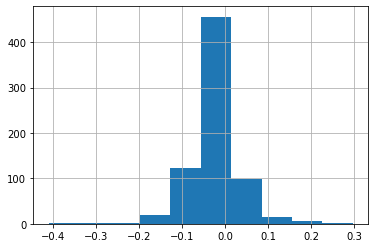

In [407]:
smb["SmB"].hist()

In [135]:
ff_all = pd.read_csv("ff_all.csv")

<AxesSubplot:>

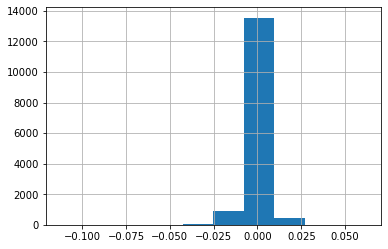

In [136]:
ff_all["smb"].hist()

In [408]:
smb.set_index("date", inplace=True)

In [409]:
smb.index = pd.to_datetime(smb.index)


In [410]:
smb

,SmB
date,
1962-01-31,-0.410813
1962-02-28,-0.009212
1962-03-30,-0.013133
1962-04-30,-0.007033
1962-05-31,-0.025687
...,...
2021-11-30,-0.027189
2021-12-31,-0.074449
2022-01-31,-0.024695


In [411]:
fff.index.names = ['date']

In [412]:
fff.index[0]

Timestamp('1962-01-31 00:00:00')

In [413]:
smb.index[0]

Timestamp('1962-01-31 00:00:00')

In [414]:
smb

,SmB
date,
1962-01-31,-0.410813
1962-02-28,-0.009212
1962-03-30,-0.013133
1962-04-30,-0.007033
1962-05-31,-0.025687
...,...
2021-11-30,-0.027189
2021-12-31,-0.074449
2022-01-31,-0.024695


In [415]:
fff = pd.merge(fff, smb, left_index=True, right_index=True)

In [420]:
fff.to_csv("our_ff.csv", index=True)

In [418]:
fff

,mkt-rf,HmL,SmB
date,,,
1962-01-31,-0.037373,-0.224775,-0.410813
1962-02-28,0.016596,-0.003241,-0.009212
1962-04-30,-0.031896,0.003064,-0.007033
1962-05-31,-0.074502,0.028983,-0.025687
1962-07-31,0.023975,-0.154631,-0.314932
...,...,...,...
2021-11-30,0.046333,-0.030402,-0.027189
2021-12-31,0.001582,-0.042329,-0.074449
2022-01-31,-0.021596,0.036769,-0.024695


In [16]:
# comp = db.raw_sql("""
#                     select cusip, permno, permco, issuno, prc, shrout
#                     from crsp.dsf
                    
#                 """)


KeyboardInterrupt: 

In [ ]:
# comp = db.raw_sql("""
#                     select cusip, permno, permco, issuno, prc, shrout
#                     from crsp.dsf
                    
#                 """)


KeyboardInterrupt: 

In [175]:
# comp = db.raw_sql("""
#                     select gvkey, datadate, at, pstkl, txditc,
#                     pstkrv, seq, pstk
#                     from comp.funda
#                     where indfmt='INDL' 
#                     and datafmt='STD'
#                     and popsrc='D'
#                     and consol='C'
#                     and datadate >= '01/01/1959'
#                     """, date_cols=['datadate'])

'''
Ticker Symbol (TIC)

Company Name (CONM)

GVKEY -- Global Company Key (GVKEY)

AT -- Assets - Total (AT)

PSTKL -- Preferred Stock Liquidating Value (PSTKL)

TXDITC -- Deferred Taxes and Investment Tax Credit (TXDITC)

PSTKRV -- Preferred Stock Redemption Value (PSTKRV)

SEQ -- Stockholders' Equity - Total (SEQ)

PSTK -- Preferred/Preference Stock (Capital) - Total (PSTK)

LT -- Liabilities - Total (LT)

'''

comp = db.raw_sql("""
                    select datadate, conm, tic, at, lt
                    from comp.funda
                   
                    """, date_cols=['datadate'])



StatementError: (builtins.AttributeError) 'NoneType' object has no attribute 'cursor'
[SQL: 
                    select datadate, conm, tic, at, lt
                    from comp.funda
                   
                    ]

In [25]:
comp["book_value"] = comp["at"] - comp["lt"]

In [26]:
comp

,datadate,conm,tic,at,lt,book_value
0,1961-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,NaN
1,1962-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,NaN
2,1963-12-31,A & E PLASTIK PAK INC,AE.2,NaN,0.345,NaN
3,1964-12-31,A & E PLASTIK PAK INC,AE.2,1.416,0.809,0.607
4,1965-12-31,A & E PLASTIK PAK INC,AE.2,2.310,1.818,0.492
...,...,...,...,...,...,...
360575,2019-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62131.888,50522.908,11608.980
360576,2020-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,60256.041,49759.540,10496.501
360577,2021-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,18678.300
360578,2021-12-31,HALEON PLC,HLN,46650.000,10793.000,35857.000


In [29]:
comp = comp.dropna()

In [32]:
len(comp.conm.unique())

35866

array([[<AxesSubplot:title={'center':'datadate'}>]], dtype=object)

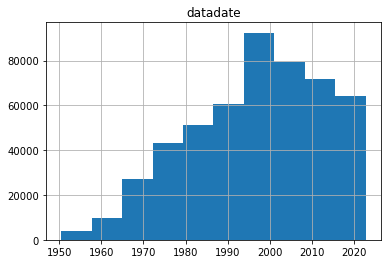

In [30]:
comp.hist("datadate")

In [225]:
# comp = db.raw_sql("""
#                     select gvkey, datadate, at, pstkl, txditc,
#                     pstkrv, seq, pstk
#                     from comp.funda
#                     where indfmt='INDL' 
#                     and datafmt='STD'
#                     and popsrc='D'
#                     and consol='C'
#                     and datadate >= '01/01/1959'
#                     """, date_cols=['datadate'])

'''
Ticker Symbol (TIC)

Company Name (CONM)

GVKEY -- Global Company Key (GVKEY)

AT -- Assets - Total (AT)

PSTKL -- Preferred Stock Liquidating Value (PSTKL)

TXDITC -- Deferred Taxes and Investment Tax Credit (TXDITC)

PSTKRV -- Preferred Stock Redemption Value (PSTKRV)

SEQ -- Stockholders' Equity - Total (SEQ)

PSTK -- Preferred/Preference Stock (Capital) - Total (PSTK)

LT -- Liabilities - Total (LT)

'''

comp = db.raw_sql("""
                    select datadate, conm, tic, at,lt, BKVLPS
                    from comp.funda
                   
                    where datadate >= '01/01/1950'
                    """, date_cols=['datadate'])



In [208]:
# comp = db.raw_sql("""
#                     select datadate, conm, tic, ATQ,LTQ
#                     from comp.fundq
#                     where datadate >= '01/01/1950'
#                     """, date_cols=['datadate'])


In [237]:
comp

,datadate,conm,tic,at,lt,bkvlps
0,1961-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,2.4342
1,1962-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,3.0497
2,1963-12-31,A & E PLASTIK PAK INC,AE.2,NaN,0.345,2.9731
3,1964-12-31,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
4,1965-12-31,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
...,...,...,...,...,...,...
360598,2019-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62131.888,50522.908,NaN
360599,2020-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,60256.041,49759.540,NaN
360600,2021-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,11.0008
360601,2021-12-31,HALEON PLC,HLN,46650.000,10793.000,71374.0000


In [212]:
comp["atq"] = comp['atq'] * 1000000
comp['ltq'] = comp['ltq'] * 1000000

In [238]:
comp.dropna(inplace=True)

In [214]:
comp["book_value"] = comp["atq"] - comp['ltq']

In [202]:
comp["book_value"] = comp["at"] - comp["lt"]

In [246]:
comp["datadate"] = pd.to_datetime(comp["datadate"])

In [247]:
comp

,datadate,conm,tic,at,lt,bkvlps
3,1964-12-31,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
4,1965-12-31,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
5,1966-12-31,A & E PLASTIK PAK INC,AE.2,2.430,1.596,3.8082
6,1967-12-31,A & E PLASTIK PAK INC,AE.2,2.456,1.712,3.3973
7,1968-12-31,A & E PLASTIK PAK INC,AE.2,5.922,3.351,6.9113
...,...,...,...,...,...,...
360590,2021-12-31,INDAPTUS THERAPEUTICS INC,INDP,40.577,4.677,4.3468
360594,2020-12-31,CELLECT BIOTECHNOLOGY LTD,QNRX,1.378,7.985,-2.1994
360596,2021-12-31,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
360600,2021-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,11.0008


In [262]:
comp = comp.set_index("datadate")

In [267]:
comp[comp["tic"] == "AE.2"].resample('MS').bfill()

,conm,tic,at,lt,bkvlps
datadate,,,,,
1964-12-01,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
1965-01-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-02-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-03-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-04-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
...,...,...,...,...,...
1977-08-01,A & E PLASTIK PAK INC,AE.2,44.025,28.149,7.1321
1977-09-01,A & E PLASTIK PAK INC,AE.2,44.025,28.149,7.1321
1977-10-01,A & E PLASTIK PAK INC,AE.2,44.025,28.149,7.1321


In [271]:
len(comp["tic"].unique())

34576

In [278]:
monthly_book = pd.DataFrame()
count = 0
num_companies = len(comp["tic"].unique())
for tic in comp["tic"].unique():
    company_data = comp[comp["tic"] == tic]
    monthly_book = monthly_book.append(company_data.resample("MS").bfill())
    #display(comp[(comp["datadate"] == row["datadate"]) & (comp["tic"] == row["tic"])].set_index('datadate').resample('M').bfill())#.reset_index())
    #display(monthly_book)
    count +=1
    if count % 1000 == 0:
        print(count/num_companies)

0.02892179546506247
0.05784359093012494
0.08676538639518741
0.11568718186024989
0.14460897732531236
0.17353077279037482
0.2024525682554373
0.23137436372049977
0.26029615918556226
0.2892179546506247
0.3181397501156872
0.34706154558074964
0.3759833410458121
0.4049051365108746
0.4338269319759371
0.46274872744099954
0.491670522906062
0.5205923183711245
0.549514113836187
0.5784359093012494
0.6073577047663119
0.6362795002313744
0.6652012956964368
0.6941230911614993
0.7230448866265617
0.7519666820916242
0.7808884775566867
0.8098102730217492
0.8387320684868117
0.8676538639518742
0.8965756594169366
0.9254974548819991
0.9544192503470615
0.983341045812124


In [285]:
monthly_book.reset_index(inplace=True)

In [227]:
returns["date"] = pd.to_datetime(returns["date"])

In [290]:
monthly_book["datadate"][0]

Timestamp('1964-12-01 00:00:00')

In [ ]:
returns["date"] = pd.to_datetime(returns["date"])

In [291]:
returns

,date,Ticker,MthPrc,ShrOut,Market Cap,return
98242,1962-01-31,PRG,71.375,2941.0,209913.875,1.480883
29401,1962-01-31,HON,121.750,7019.0,854563.250,-0.374293
1247844,1962-01-31,DSP,26.000,1224.0,31824.000,2.969466
677461,1962-01-31,L,42.250,2670.0,112807.500,-0.603751
424191,1962-01-31,FLT,30.875,1312.0,40508.000,-0.876034
...,...,...,...,...,...,...
1363588,2022-03-31,INKT,2.250,33561.0,75512.250,-0.242424
1363582,2022-03-31,HCTI,1.270,35537.0,45131.990,0.123894
1363313,2022-03-31,GTR,24.550,1325.0,32528.750,0.014849
1363993,2022-03-31,MDCP,24.150,100.0,2415.000,0.011942


In [292]:
monthly_book

,datadate,conm,tic,at,lt,bkvlps
0,1964-12-01,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
1,1965-01-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
2,1965-02-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
3,1965-03-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
4,1965-04-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
...,...,...,...,...,...,...
5074674,2021-10-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074675,2021-11-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074676,2021-12-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074677,2021-12-01,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,11.0008


In [300]:
monthly_book

,datadate,conm,tic,at,lt,bkvlps
0,1964-12-01,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
1,1965-01-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
2,1965-02-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
3,1965-03-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
4,1965-04-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
...,...,...,...,...,...,...
5074674,2021-10-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074675,2021-11-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074676,2021-12-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
5074677,2021-12-01,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,11.0008


In [325]:
returns

,date,Ticker,MthPrc,ShrOut,Market Cap,return
98242,1962-01-31,PRG,71.375,2941.0,209913.875,1.480883
29401,1962-01-31,HON,121.750,7019.0,854563.250,-0.374293
1247844,1962-01-31,DSP,26.000,1224.0,31824.000,2.969466
677461,1962-01-31,L,42.250,2670.0,112807.500,-0.603751
424191,1962-01-31,FLT,30.875,1312.0,40508.000,-0.876034
...,...,...,...,...,...,...
1363588,2022-03-31,INKT,2.250,33561.0,75512.250,-0.242424
1363582,2022-03-31,HCTI,1.270,35537.0,45131.990,0.123894
1363313,2022-03-31,GTR,24.550,1325.0,32528.750,0.014849
1363993,2022-03-31,MDCP,24.150,100.0,2415.000,0.011942


In [327]:
returns["date"] 

98242     1962-01-31
29401     1962-01-31
1247844   1962-01-31
677461    1962-01-31
424191    1962-01-31
             ...    
1363588   2022-03-31
1363582   2022-03-31
1363313   2022-03-31
1363993   2022-03-31
1325889   2022-03-31
Name: date, Length: 4311746, dtype: datetime64[ns]

In [344]:
monthly_book["datadate"] = pd.to_datetime(monthly_book["datadate"])
returns["date"] = pd.to_datetime(returns["date"])

In [354]:
returns['month'] = pd.DatetimeIndex(returns['date']).month
returns['year'] = pd.DatetimeIndex(returns['date']).year
monthly_book['month'] = pd.DatetimeIndex(monthly_book['datadate']).month
monthly_book['year'] = pd.DatetimeIndex(monthly_book['datadate']).year


In [356]:
monthly_book.drop("monthyear", axis=1, inplace=True)

In [357]:
monthly_book

,datadate,conm,tic,at,lt,bkvlps,month,year
0,1964-12-01,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969,12,1964
1,1965-01-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835,1,1965
2,1965-02-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835,2,1965
3,1965-03-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835,3,1965
4,1965-04-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835,4,1965
...,...,...,...,...,...,...,...,...
5074674,2021-10-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783,10,2021
5074675,2021-11-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783,11,2021
5074676,2021-12-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783,12,2021
5074677,2021-12-01,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,11.0008,12,2021


In [364]:
book_values = pd.merge(returns[["date","Ticker","return", "MthPrc","month", "year"]], monthly_book[["datadate", "tic", "bkvlps", "month", "year"]], left_on=["Ticker", "month", "year"], right_on=["tic", "month", "year"])

In [365]:
book_values

,date,Ticker,return,MthPrc,month,year,datadate,tic,bkvlps
0,1962-01-31,HON,-0.374293,121.75,1,1962,1962-01-01,HON,23.1192
1,1962-01-31,L,-0.603751,42.25,1,1962,1962-01-01,L,29.5150
2,1962-01-31,D,0.000000,46.50,1,1962,1962-01-01,D,17.0044
3,1962-01-31,D,-0.299435,46.50,1,1962,1962-01-01,D,17.0044
4,1962-01-31,KSE,0.617811,54.50,1,1962,1962-01-01,KSE,23.1939
...,...,...,...,...,...,...,...,...,...
1932643,2022-03-31,CPRI,-0.241364,51.39,3,2022,2022-03-01,CPRI,17.9194
1932644,2022-03-31,ROIV,-0.214626,4.94,3,2022,2022-03-01,ROIV,2.3842
1932645,2022-03-31,HIHO,-0.060000,2.82,3,2022,2022-03-01,HIHO,2.2960
1932646,2022-03-31,GWRE,0.073398,94.62,3,2022,2022-03-01,GWRE,17.2644


In [366]:
book_values.drop(["datadate", "tic", "month","year"], axis=1, inplace=True)

In [368]:
book_values["book_market"] = book_values["bkvlps"] / book_values["MthPrc"]

In [370]:
book_values

,date,Ticker,return,MthPrc,bkvlps,book_market
0,1962-01-31,HON,-0.374293,121.75,23.1192,0.189891
1,1962-01-31,L,-0.603751,42.25,29.5150,0.698580
2,1962-01-31,D,0.000000,46.50,17.0044,0.365686
3,1962-01-31,D,-0.299435,46.50,17.0044,0.365686
4,1962-01-31,KSE,0.617811,54.50,23.1939,0.425576
...,...,...,...,...,...,...
1932643,2022-03-31,CPRI,-0.241364,51.39,17.9194,0.348694
1932644,2022-03-31,ROIV,-0.214626,4.94,2.3842,0.482632
1932645,2022-03-31,HIHO,-0.060000,2.82,2.2960,0.814184
1932646,2022-03-31,GWRE,0.073398,94.62,17.2644,0.182460


In [280]:
monthly_book

,conm,tic,at,lt,bkvlps
datadate,,,,,
1964-12-01,A & E PLASTIK PAK INC,AE.2,1.416,0.809,3.0969
1965-01-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-02-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-03-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
1965-04-01,A & E PLASTIK PAK INC,AE.2,2.310,1.818,2.3835
...,...,...,...,...,...
2021-10-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
2021-11-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783
2021-12-01,CELLECT BIOTECHNOLOGY LTD,QNRX,9.357,8.700,0.0783


In [286]:
monthly_book.to_csv("monthly_book.csv")

In [373]:
book_values

,date,Ticker,return,MthPrc,bkvlps,book_market
0,1962-01-31,HON,-0.374293,121.75,23.1192,0.189891
1,1962-01-31,L,-0.603751,42.25,29.5150,0.698580
2,1962-01-31,D,0.000000,46.50,17.0044,0.365686
3,1962-01-31,D,-0.299435,46.50,17.0044,0.365686
4,1962-01-31,KSE,0.617811,54.50,23.1939,0.425576
...,...,...,...,...,...,...
1932643,2022-03-31,CPRI,-0.241364,51.39,17.9194,0.348694
1932644,2022-03-31,ROIV,-0.214626,4.94,2.3842,0.482632
1932645,2022-03-31,HIHO,-0.060000,2.82,2.2960,0.814184
1932646,2022-03-31,GWRE,0.073398,94.62,17.2644,0.182460


In [375]:
threshold = 10
count = 0
hml = pd.DataFrame()
dates = book_values["date"].unique()
for date in dates:
    date_info = book_values[book_values["date"] == date]
    date_info = date_info.sort_values("book_market", ascending=False)
    

    num_rows = int(len(date_info)*(threshold/100))
    r_high = np.array(date_info.head(num_rows)["return"]).mean()
    r_low = np.array(date_info.tail(num_rows)["return"]).mean()
    row = {'date': date, "HmL": r_high-r_low}
    hml = hml.append(row, ignore_index = True)
    count+=1
    if count % 120:
        print(count/len(dates))
    


0.0013831258644536654
0.0027662517289073307
0.004149377593360996
0.005532503457814661
0.006915629322268326
0.008298755186721992
0.009681881051175657
0.011065006915629323
0.012448132780082987
0.013831258644536652
0.015214384508990318
0.016597510373443983
0.017980636237897647
0.019363762102351315
0.02074688796680498
0.022130013831258646
0.02351313969571231
0.024896265560165973
0.02627939142461964
0.027662517289073305
0.029045643153526972
0.030428769017980636
0.0318118948824343
0.03319502074688797
0.034578146611341634
0.035961272475795295
0.03734439834024896
0.03872752420470263
0.040110650069156296
0.04149377593360996
0.042876901798063624
0.04426002766251729
0.04564315352697095
0.04702627939142462
0.048409405255878286
0.04979253112033195
0.051175656984785614
0.05255878284923928
0.05394190871369295
0.05532503457814661
0.056708160442600276
0.058091286307053944
0.059474412171507604
0.06085753803596127
0.06224066390041494
0.0636237897648686
0.06500691562932227
0.06639004149377593
0.0677731673

<AxesSubplot:>

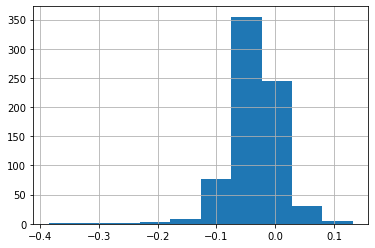

In [378]:
hml["HmL"].hist()

In [383]:
ff_all.drop_duplicates(inplace=True)

<AxesSubplot:>

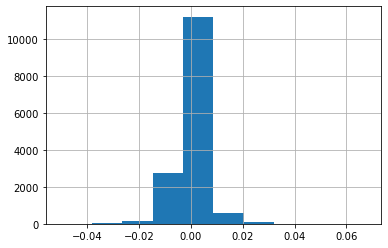

In [384]:
ff_all["hml"].hist()

In [385]:
fff

,mkt-rf
date,
1950-02-28,0.018748
1950-03-31,0.008902
1950-04-30,0.028712
1950-05-31,0.032982
1950-06-30,0.016357
...,...
2022-04-30,-0.000003
2022-05-31,-0.079926
2022-06-30,-0.035030


In [387]:
fff

,mkt-rf


In [ ]:
fff = 

In [394]:
fff.index.names = ["date"]

In [397]:
hml = hml.set_index("date")

In [398]:
fff = pd.merge(fff, hml, left_index=True, right_index=True)

In [399]:
fff

,mkt-rf,HmL
date,,
1962-01-31,-0.037373,-0.224775
1962-02-28,0.016596,-0.003241
1962-04-30,-0.031896,0.003064
1962-05-31,-0.074502,0.028983
1962-07-31,0.023975,-0.154631
...,...,...
2021-11-30,0.046333,-0.030402
2021-12-31,0.001582,-0.042329
2022-01-31,-0.021596,0.036769


In [ ]:
returns

In [429]:
threshold = 10
count = 0
mom = pd.DataFrame()
dates = returns["date"].unique()
for date in dates:
    date_info = returns[returns["date"] == date]
    date_info["abs_return"] = abs(date_info["return"])
    date_info = date_info.sort_values("abs_return", ascending=False)
    num_rows = int(len(date_info)*(threshold/100))
    r_vol = np.array(date_info.head(num_rows)["return"]).mean()
    r_stable = np.array(date_info.tail(num_rows)["return"]).mean()
    
    row = {'date': date, "VmS": r_vol-r_stable}
    mom = mom.append(row, ignore_index = True)
    count+=1
    if count % 120:
        print(count/len(dates))

0.0013831258644536654
0.0027662517289073307
0.004149377593360996
0.005532503457814661
0.006915629322268326
0.008298755186721992
0.009681881051175657
0.011065006915629323
0.012448132780082987
0.013831258644536652
0.015214384508990318
0.016597510373443983
0.017980636237897647
0.019363762102351315
0.02074688796680498
0.022130013831258646
0.02351313969571231
0.024896265560165973
0.02627939142461964
0.027662517289073305
0.029045643153526972
0.030428769017980636
0.0318118948824343
0.03319502074688797
0.034578146611341634
0.035961272475795295
0.03734439834024896
0.03872752420470263
0.040110650069156296
0.04149377593360996
0.042876901798063624
0.04426002766251729
0.04564315352697095
0.04702627939142462
0.048409405255878286
0.04979253112033195
0.051175656984785614
0.05255878284923928
0.05394190871369295
0.05532503457814661
0.056708160442600276
0.058091286307053944
0.059474412171507604
0.06085753803596127
0.06224066390041494
0.0636237897648686
0.06500691562932227
0.06639004149377593
0.0677731673

<AxesSubplot:>

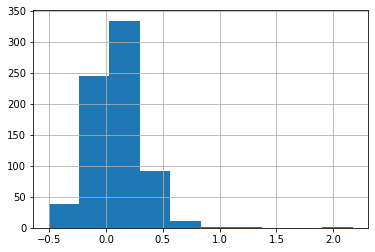

In [433]:
mom["VmS"].hist()

In [438]:
mom = mom.set_index("date")

In [444]:
fff = pd.merge(fff.set_index("date"), mom, left_index=True, right_index=True)

In [445]:
fff.to_csv("our_ff_w_mom.csv", index=True)

In [446]:
pd.read_csv("our_ff_w_mom.csv")

,date,mkt-rf,HmL,SmB,VmS
0,1962-01-31,-0.037373,-0.224775,-0.410813,2.172360
1,1962-02-28,0.016596,-0.003241,-0.009212,0.046280
2,1962-04-30,-0.031896,0.003064,-0.007033,-0.205647
3,1962-05-31,-0.074502,0.028983,-0.025687,-0.269349
4,1962-07-31,0.023975,-0.154631,-0.314932,-0.289084
...,...,...,...,...,...
500,2021-11-30,0.046333,-0.030402,-0.027189,-0.152350
501,2021-12-31,0.001582,-0.042329,-0.074449,-0.128343
502,2022-01-31,-0.021596,0.036769,-0.024695,-0.231796
503,2022-02-28,-0.030136,-0.053269,-0.027714,-0.007075


In [441]:
fff = pd.read_csv("our_ff.csv")

,date,mkt-rf,HmL,SmB
0,1962-01-31,-0.037373,-0.224775,-0.410813
1,1962-02-28,0.016596,-0.003241,-0.009212
2,1962-04-30,-0.031896,0.003064,-0.007033
3,1962-05-31,-0.074502,0.028983,-0.025687
4,1962-07-31,0.023975,-0.154631,-0.314932
...,...,...,...,...
500,2021-11-30,0.046333,-0.030402,-0.027189
501,2021-12-31,0.001582,-0.042329,-0.074449
502,2022-01-31,-0.021596,0.036769,-0.024695
503,2022-02-28,-0.030136,-0.053269,-0.027714
